# 1) Importing the data

In [1]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import date

In [2]:
# import data
dim_company_type = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_company_type.csv')
dim_educational_qualification = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_educational_qualification.csv')
dim_gender = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_gender.csv')
dim_industry = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_industry.csv')
dim_job_specialisation = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_job_specialisation.csv')
dim_nationality = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_nationality.csv')
dim_race = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_race.csv')
dim_source = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_source.csv')
dim_state = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_state.csv')
dim_working_arrangement = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_working_arrangement.csv')
fact_job_details = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\fact_job_details.csv')
fact_submissions = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\fact_submissions.csv')

## Merge fact_submissions

In [3]:
fact_submissions.head()

,submission_id,created_at,source_key,educational_qualification_key,gender_key,nationality_key,race_key,age,advice
0,1,2022-03-10 12:51:52,1,8,2,1,1,27.0,NaN
1,2,2022-03-10 12:51:57,1,5,2,1,1,23.0,NaN
2,3,2022-03-10 12:52:04,1,6,1,1,1,29.0,NaN
3,4,2022-03-10 12:52:10,1,5,2,1,1,27.0,NaN
4,5,2022-03-10 12:52:21,1,5,2,1,1,26.0,NaN


In [4]:
# join educational_qualification
fact_submissions = pd.merge(left = fact_submissions,
                            right = dim_educational_qualification,
                            how = 'left',
                           on = 'educational_qualification_key')
fact_submissions.drop(columns = ['educational_qualification_key', 'educational_qualification_bm'], inplace = True)

# join gender
fact_submissions = pd.merge(left = fact_submissions,
                            right = dim_gender,
                            how = 'left',
                            on = 'gender_key')
fact_submissions.drop(columns = ['gender_key', 'gender_bm'], inplace = True)

# join nationality
fact_submissions = pd.merge(left = fact_submissions,
                            right = dim_nationality,
                            how = 'left',
                            on = 'nationality_key')
fact_submissions.drop(columns = ['nationality_key', 'nationality_bm', 'code_alpha2', 'code_alpha3', 'region'], inplace = True)

# join race
fact_submissions = pd.merge(left = fact_submissions,
                            right = dim_race,
                            how = 'left',
                            on = 'race_key')
fact_submissions.drop(columns = ['race_key', 'race_bm'], inplace = True)

In [5]:
fact_submissions.head()

,submission_id,created_at,source_key,age,advice,educational_qualification_en,gender_en,nationality_en,race_en
0,1,2022-03-10 12:51:52,1,27.0,NaN,Master's Degree (Overseas),Male,Malaysia,Chinese
1,2,2022-03-10 12:51:57,1,23.0,NaN,Bachelor's Degree (Local),Male,Malaysia,Chinese
2,3,2022-03-10 12:52:04,1,29.0,NaN,Bachelor's Degree (Overseas),Female,Malaysia,Chinese
3,4,2022-03-10 12:52:10,1,27.0,NaN,Bachelor's Degree (Local),Male,Malaysia,Chinese
4,5,2022-03-10 12:52:21,1,26.0,NaN,Bachelor's Degree (Local),Male,Malaysia,Chinese


## Merge fact_job_details

In [6]:
fact_job_details.head()

,job_id,submission_id,experience_months,industry_key,job_specialisation_key,job_title,company_type_key,gross_salary_myr,working_arrangement_key,located_in_malaysia,state_key,avg_working_hours_per_day,avg_working_days_per_week,salary_compensation_satisfaction_score,job_satisfaction_score,thoughts_comments
0,1,1,24,23.0,20.0,Data Analyst,3,6700.0,2,True,1,8.0,5.0,4,3,NaN
1,2,2,12,23.0,48.0,IT specialist,3,5850.0,1,True,1,10.0,5.0,4,2,High salary but have to deal with very toxic m...
2,3,3,72,NaN,68.0,Product specialist,3,7500.0,1,True,1,9.0,5.0,4,4,NaN
3,4,4,36,23.0,20.0,Senior executive - Data Analytics,3,3800.0,2,True,15,8.0,5.0,4,3,NaN
4,5,5,48,17.0,69.0,Demand Planner,3,12000.0,1,True,4,8.0,5.0,3,3,NaN


In [7]:
# join industry
fact_job_details = pd.merge(left = fact_job_details,
                            right = dim_industry,
                            how = 'left',
                           on = 'industry_key')
fact_job_details.drop(columns = ['industry_key', 'industry_bm', 'industry_sub_definitions'], inplace = True)

# join job_specialisation
fact_job_details = pd.merge(left = fact_job_details,
                            right = dim_job_specialisation,
                            how = 'left',
                           on = 'job_specialisation_key')
fact_job_details.drop(columns = ['job_specialisation_key', 'job_specialisation_bm', 'job_specialisation_sub_definitions'], inplace = True)

# join company_type
fact_job_details = pd.merge(left = fact_job_details,
                            right = dim_company_type,
                            how = 'left',
                            on = 'company_type_key')
fact_job_details.drop(columns = ['company_type_key', 'company_type_bm'], inplace = True)

# join working_arrangement
fact_job_details = pd.merge(left = fact_job_details,
                            right = dim_working_arrangement,
                            how = 'left',
                            on = 'working_arrangement_key')
fact_job_details.drop(columns = ['working_arrangement_key', 'working_arrangement_bm'], inplace = True)

# join state
fact_job_details = pd.merge(left = fact_job_details,
                            right = dim_state,
                            how = 'left',
                            on = 'state_key')
fact_job_details.drop(columns = ['state_key', 'state_bm'], inplace = True)

In [8]:
fact_job_details.head()

,job_id,submission_id,experience_months,job_title,gross_salary_myr,located_in_malaysia,avg_working_hours_per_day,avg_working_days_per_week,salary_compensation_satisfaction_score,job_satisfaction_score,thoughts_comments,industry_en,job_specialisation_en,company_type_en,working_arrangement_en,state_en
0,1,1,24,Data Analyst,6700.0,True,8.0,5.0,4,3,NaN,Financial services / Investment / Banking / In...,"Data Scientists, Data Analytics, Data Engineer...",Multinational Corporation,Fully Working from Office,Federal Territory of Kuala Lumpur
1,2,2,12,IT specialist,5850.0,True,10.0,5.0,4,2,High salary but have to deal with very toxic m...,Financial services / Investment / Banking / In...,"IT - Software and Web Developers, Programmers,...",Multinational Corporation,Fully Working from Home,Federal Territory of Kuala Lumpur
2,3,3,72,Product specialist,7500.0,True,9.0,5.0,4,4,NaN,NaN,Project and Product Management,Multinational Corporation,Fully Working from Home,Federal Territory of Kuala Lumpur
3,4,4,36,Senior executive - Data Analytics,3800.0,True,8.0,5.0,4,3,NaN,Financial services / Investment / Banking / In...,"Data Scientists, Data Analytics, Data Engineer...",Multinational Corporation,Fully Working from Office,Selangor
4,5,5,48,Demand Planner,12000.0,True,8.0,5.0,3,3,NaN,Electronics,"Purchasing, Procurement, Demand / Supply Plann...",Multinational Corporation,Fully Working from Home,Johor


# 2) Analysis

## Benford's Law

In [9]:
# get first, second number of salary amounts
df_salary_int = pd.DataFrame()
df_salary_int['salary'] = fact_job_details['gross_salary_myr'].astype({'gross_salary_myr': 'int64'})
df_salary_int['first_digit'] = df_salary_int['salary'].astype(str).str[:1]
df_salary_int['second_digit'] = df_salary_int['salary'].astype(str).str[1:2]
df_salary_int

,salary,first_digit,second_digit
0,6700,6,7
1,5850,5,8
2,7500,7,5
3,3800,3,8
4,12000,1,2
...,...,...,...
4543,27000,2,7
4544,800,8,0
4545,11000,1,1
4546,2750,2,7


<AxesSubplot:xlabel='count', ylabel='first_digit'>

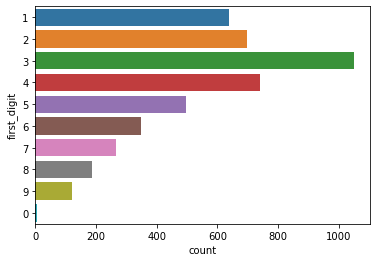

In [10]:
# histogram for first digit
sns.countplot(data = df_salary_int,
              y = 'first_digit',
             order = ['1','2','3','4','5','6','7','8','9','0'])

In [11]:
df_first_digit_counts = pd.DataFrame()
df_first_digit_counts = df_salary_int.groupby(['first_digit']).size().to_frame('count')
df_first_digit_counts['percentage'] = 100 * (df_first_digit_counts['count']/len(df_salary_int))
df_first_digit_counts

,count,percentage
first_digit,,
0,4,0.087951
1,637,14.006157
2,699,15.369393
3,1052,23.131047
4,740,16.270888
5,495,10.883905
6,347,7.629727
7,265,5.826737
8,187,4.111697


<AxesSubplot:xlabel='count', ylabel='second_digit'>

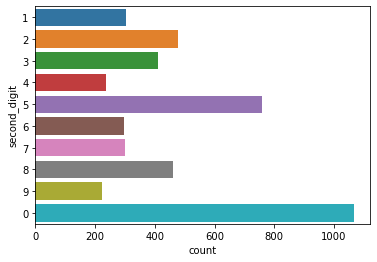

In [12]:
# histogram for second digit
sns.countplot(data = df_salary_int,
              y = 'second_digit',
             order = ['1','2','3','4','5','6','7','8','9','0'])

In [13]:
df_second_digit_counts = pd.DataFrame()
df_second_digit_counts = df_salary_int.groupby(['second_digit']).size().to_frame('count')
df_second_digit_counts['percentage'] = 100 * (df_second_digit_counts['count']/len(df_salary_int))
df_second_digit_counts

,count,percentage
second_digit,,
,13,0.285840
0,1068,23.482850
1,304,6.684257
2,479,10.532102
3,411,9.036939
4,235,5.167106
5,759,16.688654
6,296,6.508355
7,300,6.596306


## Submissions over time

In [14]:
fact_submissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4548 entries, 0 to 4547
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   submission_id                 4548 non-null   int64  
 1   created_at                    4548 non-null   object 
 2   source_key                    4548 non-null   int64  
 3   age                           4531 non-null   float64
 4   advice                        0 non-null      float64
 5   educational_qualification_en  4548 non-null   object 
 6   gender_en                     4548 non-null   object 
 7   nationality_en                4548 non-null   object 
 8   race_en                       4548 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 355.3+ KB


In [15]:
# make datetime type
fact_submissions = fact_submissions.astype({'created_at': 'datetime64'})

# new columns for separate date and time
fact_submissions['date'] = fact_submissions['created_at'].dt.date
fact_submissions['time'] = fact_submissions['created_at'].dt.time
fact_submissions = fact_submissions.astype({'date': 'datetime64'})

In [16]:
fact_submissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4548 entries, 0 to 4547
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   submission_id                 4548 non-null   int64         
 1   created_at                    4548 non-null   datetime64[ns]
 2   source_key                    4548 non-null   int64         
 3   age                           4531 non-null   float64       
 4   advice                        0 non-null      float64       
 5   educational_qualification_en  4548 non-null   object        
 6   gender_en                     4548 non-null   object        
 7   nationality_en                4548 non-null   object        
 8   race_en                       4548 non-null   object        
 9   date                          4548 non-null   datetime64[ns]
 10  time                          4548 non-null   object        
dtypes: datetime64[ns](2), float64(

In [17]:
fact_submissions['date'].head()

0   2022-03-10
1   2022-03-10
2   2022-03-10
3   2022-03-10
4   2022-03-10
Name: date, dtype: datetime64[ns]

In [18]:
fact_submissions['time'].head()

0    12:51:52
1    12:51:57
2    12:52:04
3    12:52:10
4    12:52:21
Name: time, dtype: object

In [19]:
# generate series from 1st of launch month to today
min_date = np.min(fact_submissions['date'])
dates = pd.date_range(start = min_date, end = date.today(), freq='D')
df_dates = pd.Series(dates).to_frame()
df_dates.columns = ['date']

In [20]:
df_dates.head()

,date
0,2022-03-10
1,2022-03-11
2,2022-03-12
3,2022-03-13
4,2022-03-14


In [21]:
fact_submissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4548 entries, 0 to 4547
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   submission_id                 4548 non-null   int64         
 1   created_at                    4548 non-null   datetime64[ns]
 2   source_key                    4548 non-null   int64         
 3   age                           4531 non-null   float64       
 4   advice                        0 non-null      float64       
 5   educational_qualification_en  4548 non-null   object        
 6   gender_en                     4548 non-null   object        
 7   nationality_en                4548 non-null   object        
 8   race_en                       4548 non-null   object        
 9   date                          4548 non-null   datetime64[ns]
 10  time                          4548 non-null   object        
dtypes: datetime64[ns](2), float64(

In [22]:
# get submission count for each day
df_submissions_per_day = fact_submissions.groupby('date').size().to_frame('count')
df_submissions_per_day.reset_index(inplace = True)

In [23]:
df_submissions_per_day = df_submissions_per_day.astype({'date': 'datetime64'})

In [24]:
# add col for cumulative submission count
df_submissions_per_day['cumulative_count'] = df_submissions_per_day['count'].cumsum()

In [25]:
df_submissions_per_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              75 non-null     datetime64[ns]
 1   count             75 non-null     int64         
 2   cumulative_count  75 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 KB


In [26]:
# merge
df_submissions_per_day = pd.merge(left = df_dates,
                                  right = df_submissions_per_day,
                                  how = 'left',
                                  on = 'date')

In [27]:
# add days since launch column
df_submissions_per_day['days_since_launch'] = df_submissions_per_day['date'] - min_date

# change to int
df_submissions_per_day['days_since_launch'] = df_submissions_per_day['days_since_launch'].dt.days

In [28]:
# fill down
df_submissions_per_day['cumulative_count'].ffill(axis = 0, inplace = True)

# fillna
df_submissions_per_day['cumulative_count'].fillna(value = 0, inplace = True)

In [29]:
df_submissions_per_day

,date,count,cumulative_count,days_since_launch
0,2022-03-10,2287.0,2287.0,0
1,2022-03-11,397.0,2684.0,1
2,2022-03-12,86.0,2770.0,2
3,2022-03-13,42.0,2812.0,3
4,2022-03-14,205.0,3017.0,4
...,...,...,...,...
82,2022-05-31,NaN,4548.0,82
83,2022-06-01,NaN,4548.0,83
84,2022-06-02,NaN,4548.0,84
85,2022-06-03,NaN,4548.0,85


In [30]:
df_submissions_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               87 non-null     datetime64[ns]
 1   count              75 non-null     float64       
 2   cumulative_count   87 non-null     float64       
 3   days_since_launch  87 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.4 KB


<AxesSubplot:xlabel='date', ylabel='cumulative_count'>

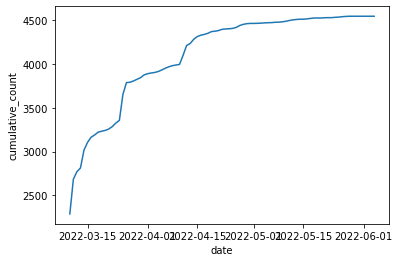

In [31]:
# timeline of submissions
sns.lineplot(data = df_submissions_per_day,
             x = 'date',
             y = 'cumulative_count',
             palette = 'pastel')

<AxesSubplot:xlabel='days_since_launch', ylabel='cumulative_count'>

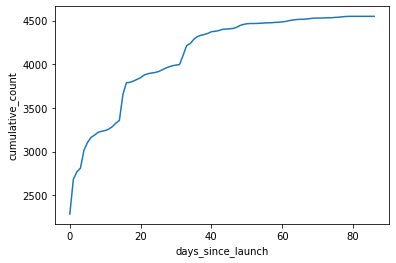

In [32]:
# timeline of submissions days since launch
sns.lineplot(data = df_submissions_per_day,
             x = 'days_since_launch',
             y = 'cumulative_count',
             palette = 'pastel')

## Submissions per time of day

In [33]:
# change data type to string
fact_submissions = fact_submissions.astype({'time': 'string'})
fact_submissions['time'].head()

0    12:51:52
1    12:51:57
2    12:52:04
3    12:52:10
4    12:52:21
Name: time, dtype: string

In [34]:
len(fact_submissions['time'].unique())

4341

In [35]:
# new time column without seconds
fact_submissions['rounded_time'] = fact_submissions['time'].str[:2]
fact_submissions['rounded_time'].head()

0    12
1    12
2    12
3    12
4    12
Name: rounded_time, dtype: string

In [36]:
len(fact_submissions['rounded_time'].unique())

24

In [37]:
# get submission count for hour:min time
df_submissions_per_time = fact_submissions.groupby('rounded_time').size().to_frame('count')
df_submissions_per_time.reset_index(inplace = True)

In [38]:
df_submissions_per_time.head()

,rounded_time,count
0,00,141
1,01,68
2,02,43
3,03,25
4,04,13


<AxesSubplot:xlabel='count', ylabel='rounded_time'>

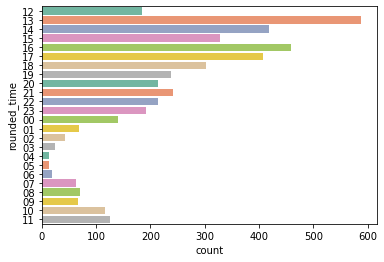

In [39]:
sns.countplot(data = fact_submissions,
              y = 'rounded_time',
              palette = 'Set2')

## Submission demographics

<AxesSubplot:xlabel='gender_en', ylabel='count'>

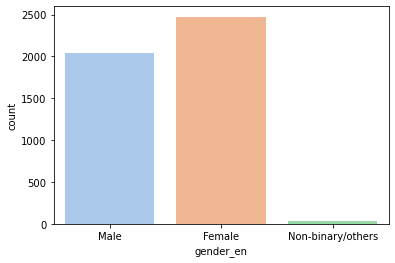

In [40]:
# gender breakdown
sns.countplot(data = fact_submissions,
              x = 'gender_en',
              palette = 'pastel')

<AxesSubplot:xlabel='count', ylabel='educational_qualification_en'>

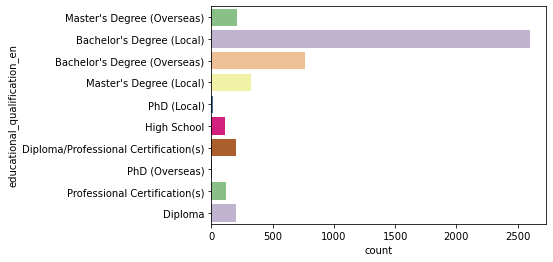

In [41]:
# educational qualification breakdown
sns.countplot(data = fact_submissions,
              y = 'educational_qualification_en',
              palette = 'Accent')

<AxesSubplot:xlabel='count', ylabel='race_en'>

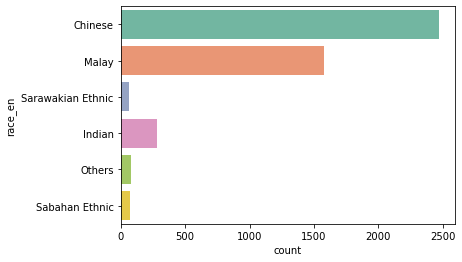

In [42]:
# race breakdown
sns.countplot(data = fact_submissions,
              y = 'race_en',
              palette = 'Set2')

In [43]:
race_gender_breakdown = fact_submissions.groupby(['race_en', 'gender_en']).size().to_frame('count')
race_gender_breakdown.reset_index(inplace = True)

In [44]:
race_gender_breakdown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   race_en    18 non-null     object
 1   gender_en  18 non-null     object
 2   count      18 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 560.0+ bytes


In [45]:
race_gender_breakdown = race_gender_breakdown.pivot(index = 'gender_en', columns = 'race_en', values = 'count')
race_gender_breakdown

race_en,Chinese,Indian,Malay,Others,Sabahan Ethnic,Sarawakian Ethnic
gender_en,,,,,,
Female,1294,138,919,42,44,37
Male,1163,143,651,34,27,25
Non-binary/others,16,2,8,3,1,1


<AxesSubplot:xlabel='count', ylabel='race_en'>

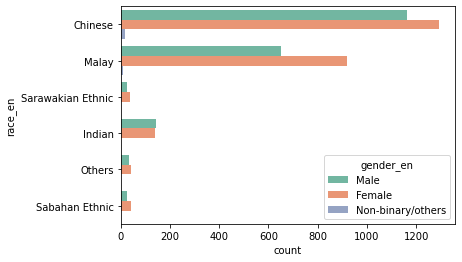

In [46]:
# race gender breakdown
sns.countplot(data = fact_submissions,
              y = 'race_en',
              hue = 'gender_en',
              palette = 'Set2')

In [47]:
# edu race breakdown
edu_race_breakdown = fact_submissions.groupby(['race_en', 'educational_qualification_en']).size().to_frame('count')
edu_race_breakdown.reset_index(inplace = True)
edu_race_breakdown = edu_race_breakdown.pivot(index = 'educational_qualification_en', columns = 'race_en', values = 'count')
edu_race_breakdown

race_en,Chinese,Indian,Malay,Others,Sabahan Ethnic,Sarawakian Ethnic
educational_qualification_en,,,,,,
Bachelor's Degree (Local),1379.0,149.0,965.0,34.0,43.0,33.0
Bachelor's Degree (Overseas),466.0,41.0,217.0,21.0,10.0,7.0
Diploma,107.0,18.0,59.0,6.0,3.0,7.0
Diploma/Professional Certification(s),106.0,14.0,70.0,6.0,5.0,2.0
High School,65.0,11.0,26.0,5.0,3.0,1.0
Master's Degree (Local),150.0,35.0,127.0,3.0,3.0,7.0
Master's Degree (Overseas),125.0,6.0,68.0,2.0,1.0,3.0
PhD (Local),9.0,1.0,3.0,NaN,NaN,NaN
PhD (Overseas),NaN,1.0,5.0,NaN,1.0,NaN


<AxesSubplot:xlabel='count', ylabel='educational_qualification_en'>

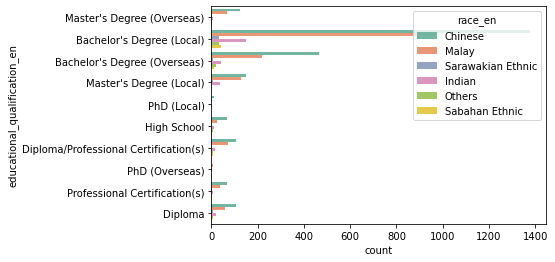

In [48]:
# edu race breakdown
sns.countplot(data = fact_submissions,
              y = 'educational_qualification_en',
              hue = 'race_en',
              palette = 'Set2')

In [49]:
# edu gender breakdown
edu_gender_breakdown = fact_submissions.groupby(['gender_en', 'educational_qualification_en']).size().to_frame('count')
edu_gender_breakdown.reset_index(inplace = True)
edu_gender_breakdown = edu_gender_breakdown.pivot(index = 'educational_qualification_en', columns = 'gender_en', values = 'count')
edu_gender_breakdown

gender_en,Female,Male,Non-binary/others
educational_qualification_en,,,
Bachelor's Degree (Local),1476.0,1110.0,17.0
Bachelor's Degree (Overseas),380.0,376.0,6.0
Diploma,101.0,98.0,1.0
Diploma/Professional Certification(s),110.0,92.0,1.0
High School,48.0,60.0,3.0
Master's Degree (Local),188.0,135.0,2.0
Master's Degree (Overseas),94.0,111.0,NaN
PhD (Local),5.0,8.0,NaN
PhD (Overseas),5.0,2.0,NaN


<AxesSubplot:xlabel='count', ylabel='educational_qualification_en'>

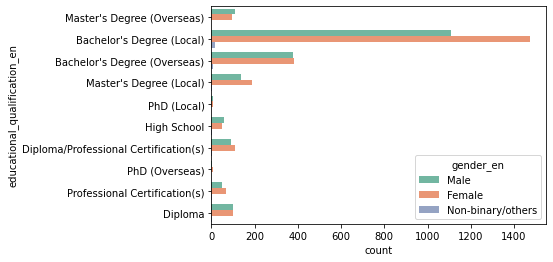

In [50]:
# edu gender breakdown
sns.countplot(data = fact_submissions,
              y = 'educational_qualification_en',
              hue = 'gender_en',
              palette = 'Set2')

## Salary

In [51]:
fact_job_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4548 entries, 0 to 4547
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   job_id                                  4548 non-null   int64  
 1   submission_id                           4548 non-null   int64  
 2   experience_months                       4548 non-null   int64  
 3   job_title                               4548 non-null   object 
 4   gross_salary_myr                        4548 non-null   float64
 5   located_in_malaysia                     4548 non-null   bool   
 6   avg_working_hours_per_day               4548 non-null   float64
 7   avg_working_days_per_week               4548 non-null   float64
 8   salary_compensation_satisfaction_score  4548 non-null   int64  
 9   job_satisfaction_score                  4548 non-null   int64  
 10  thoughts_comments                       2285 non-null   obje